[drone dataset training with maskrcnn](https://towardsdatascience.com/object-drones-detection-step-by-step-guide-on-mask-r-cnn-7bec0fb09a1)  
[custom object detection from scratch](https://towardsdatascience.com/object-drones-detection-step-by-step-guide-on-mask-r-cnn-7bec0fb09a1)

[create pet_tf_record](https://github.com/tensorflow/models/blob/master/research/object_detection/dataset_tools/create_pet_tf_record.py)


cite:
```
 Aksoy, Mehmet Çağrı; Orak, Alp Sezer; Özkan, Hasan Mertcan; Selimoğlu, Bilgin (2019), “Drone Dataset: Amateur Unmanned Air Vehicle Detection”, Mendeley Data, v4 http://dx.doi.org/10.17632/zcsj2g2m4c.4 
```

[dataset link](https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zcsj2g2m4c-4.zip)

to download:  
`wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zcsj2g2m4c-4.zip`

install opencv with pip  
`pip install opencv-python`

In [27]:
# needed imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



In [28]:
pwd

'/nfs/student/student/j/jpierre/Documents/sandbox/machine_learning/jupyter_notebooks/custom_training'

In [29]:
# default variables
drone_database = r"drone_dataset/Database1"
os.path.exists(drone_database)

True

In [30]:
prob_list = ['video17_295','video19_1900'] # cant read format
txt_list = [f for f in os.listdir(drone_database) if f.endswith(".txt") and f[:-4] not in prob_list]
file_list = set([re.match("\w+(?=.)", f)[0] for f in txt_list])

# create data list as tuple of (jpeg, txt)
data_list = []
for f in file_list:
    data_list.append((f+".JPEG", f+".txt"))

In [31]:
X, y = [], []
img_box = []
DIMENSION = 128 # low resolution means less training time

for i in range(len(data_list)):
    # get bounding box and check if label exist
    with open(os.path.join(drone_database,data_list[i][1]), "rb") as f:
        box = f.read().split()
        if len(box) != 5:
            continue # skip data with no labels

        box = [float(s) for s in box[1:]]
        img = cv2.imread(os.path.join(drone_database, data_list[i][0]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # resize image to 128, 128
        img = cv2.resize(img, (DIMENSION, DIMENSION),interpolation=cv2.INTER_LINEAR)
        
        # draw bounding boxes around images
        resize1, resize2 = img.shape[0]/DIMENSION, img.shape[1]/DIMENSION
        p1, p2, p3, p4 = int(box[0]*img.shape[1]*resize2), int(box[1]*img.shape[0]*resize1),int(box[2]*img.shape[1]*resize2), int(box[3]*img.shape[0]*resize1)
        
        ymin, ymax, xmin, xmax = p2-p4//2, p2+p4//2, p1-p3//2, p1+p3//2
        
        draw = cv2.rectangle(img.copy(), (xmax, ymax),(xmin, ymin),color=(255,255,0), thickness=1)
        
        # don't store images with less then 20 pixels
        if ymax  - ymin >= 20:
            X.append(img)
            y.append([ymin, ymax, xmin, xmax])
            img_box.append(draw)
            
            
X = np.array(X).astype(np.uint8)
y = np.array(y)
img_box = np.array(img_box)

            
print(len(X))
print(len(data_list))

693
4008


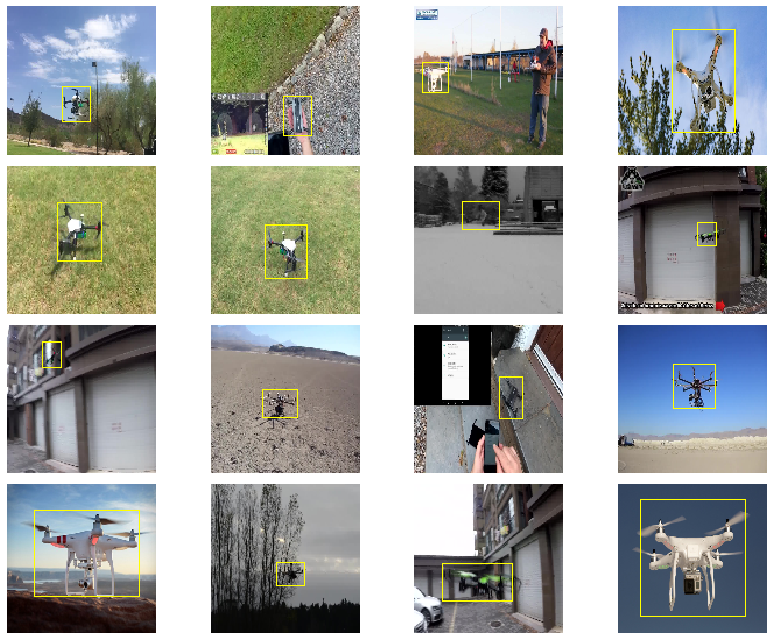

In [32]:
def show_images(img, num_of_imgs=16):
    if len(img) < num_of_imgs:
        print("not enough image to show")
        
        # get 16 images
    plt.figure()
    rows, cols = 4, 4

    for i in range(num_of_imgs):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img[i], cmap='Greys')
#         pred = model.predict(x_test[imi].reshape(1,28,28,1))
#         plt.title(f"pred: {pred.argmax()}\nactual: {y_test_non_categorical[imi]}")
        plt.axis('off')
    plt.tight_layout()
    
show_images(img_box, 16)

In [33]:
# train test split 80:20np.random.seed(42) # for reproducibility
p = np.random.permutation(len(X))
X = X[p].copy()
y = y[p].copy()

split = int(0.8 * len(X))

X_train = X[:split]
y_train = y[:split]
X_val = X[split:]
y_val = y[split:]
print(f"{len(X_train)}, {len(X_val)}")

554, 139


In [34]:

import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

### to create custom dataset
* download [dataset](https://data.mendeley.com/datasets/zcsj2g2m4c/4)
* rename files to jpg
* convert .txt files to .csv

* install [labelImg](https://github.com/tzutalin/labelImg)
* another image annotator [VGG Image Anotator](http://www.robots.ox.ac.uk/~vgg/software/via/)
* follow example from [this](https://github.com/mwindowshz/YoloToTfRecords)
* [train a raccoon detector](https://towardsdatascience.com/how-to-train-your-own-object-detector-with-tensorflows-object-detector-api-bec72ecfe1d9)